In [66]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [67]:
# read data
spectrum_train = pd.read_excel('spectrum_train.xlsx')
spectrum_test = pd.read_excel('spectrum_valid.xlsx')
temp_train = pd.read_excel('temp_train.xlsx')
temp_test = pd.read_excel('temp_valid.xlsx')

In [68]:
# scale spectrum data
scale = 10**12
spectrum_train = spectrum_train.multiply(scale)
spectrum_test = spectrum_test.multiply(scale)

In [69]:
from sklearn.model_selection import train_test_split
# set train and test data

# 1 - temp to spectrum
# 0 - spectrum to temp
direction = 0

# use only if split == 1
# 1 - combine given training and validation data
# 0 - use only training data
combine = 1

if not combine:
    if direction:
        X_train = temp_train
        X_test = temp_test
        y_train = spectrum_train
        y_test = spectrum_test
    else:
        X_train = spectrum_train
        X_test = spectrum_test
        y_train = temp_train
        y_test = temp_test
else:
    spectrum = pd.concat([spectrum_train, spectrum_test], axis=0)
    temp = pd.concat([temp_train, temp_test], axis=0)
    if direction:
        X_train, X_test, y_train, y_test = train_test_split(temp, spectrum, test_size=0.3, random_state=101)
    else:
        X_train, X_test, y_train, y_test = train_test_split(spectrum, temp, test_size=0.3, random_state=101)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
pred = model.predict(X_test)

In [72]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  0.002217239516016552
MSE:  3.679067524774439e-05
RMSE:  0.00606553173660351


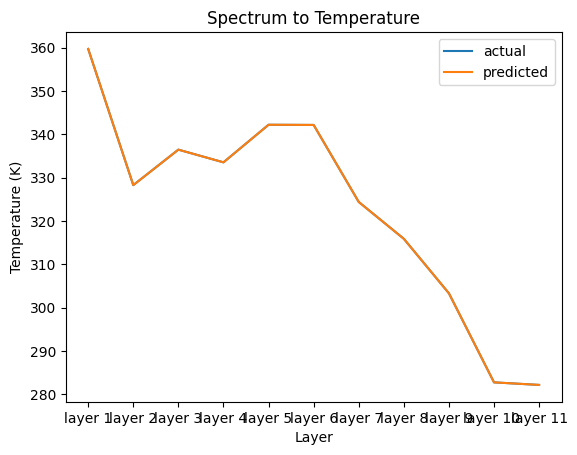

In [73]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(pred))

actual_np = y_test.values[index]
pred_np = pred[index]


plt.plot(y_train.columns, actual_np, label='actual')
plt.plot(y_train.columns, pred_np,  label='predicted')

if direction:
    plt.title("Temperature to Spectrum")
    plt.xlabel("Wavlength")
    plt.ylabel("Intensity")
else:
    plt.title("Spectrum to Temperature")
    plt.xlabel("Layer")
    plt.ylabel("Temperature (K)")

plt.legend()
plt.show()

In [74]:
actual_np

array([359.72327987, 328.27703407, 336.46725283, 333.53750687,
       342.21171007, 342.17067099, 324.38997109, 315.88219517,
       303.29632065, 282.73598676, 282.14517744])

In [75]:
pred_np

array([359.71315184, 328.27362187, 336.46482755, 333.53652195,
       342.2130477 , 342.1699389 , 324.3893878 , 315.88180601,
       303.29649071, 282.73584579, 282.14519092])